(content:rv:logn)=
# Log-normal distribution

Taking the exponential of a Normal random variable with mean $\lambda$ and standard deviation $\zeta$ gives a *log-normal* random variable;
i.e., the natural logarithm of the random variable follows a {ref}`content:rv:normal`.

In the following, let $X$ be a random variable that follows a \emph{log-normal} distribution with parameters $\lambda$ and $\zeta$,
and let $x$ denote a particular outcome of $X$.
If the distribution of $X$ is shifted by parameter $\varepsilon$, the distribution is referred to as *shifted log-normal* distribution 
(If not mentioned explicitly, this parameter equals *zero*).

In [1]:
import fesslix as flx
flx.load_engine()

import numpy as np
import fesslix.plot as flx_plot
import matplotlib.pyplot as plt
%matplotlib inline

Random Number Generator: MT19937 - initialized with rand()=2082457477;
Random Number Generator: MT19937 - initialized with 1000 initial calls.


## Syntax

```{eval-rst}
.. py:property:: logn

   Log-normal distribution

   ``logn`` is a distribution type (:type:`flx_rv_type`) for :ref:`content:rv:basics` in Fesslix.

   Parametrization:
       Parameters of the distribution can be specified as additional key-value pairs in an object of type :type:`flx_rv_config`. 
       The following combinations of parameters are accepted:

         - ``mu``, ``sd``
         - ``lambda``, ``zeta``
         - ``mode``, ``sd``
         - ``median``, ``sd``
         - ``median``, ``cov``
         - ``mode``, ``cov``
         - ``val_1``, ``pr_1``, ``val_2``, ``pr_2``
         - ``cov``, ``val_1``, ``pr_1``

       Additionally, the key-value pair ``epsilon`` is allowed for any parametrization.
         
       The interpretation of the parameters is:

         - ``mu`` (*float*): mean value; only positive values larger than `epsilon` are allowed    
         - ``sd`` (*float*): standard deviation; only positive values are allowed    
         - ``epsilon`` (*float*, default: 0.0): right-shift of distribution; only positive values are allowed   
         - ``mode`` (*float*): mode of distribution; only positive values larger than `epsilon` are allowed   
         - ``median`` (*float*): median of distribution; only positive values larger than `epsilon` are allowed         
         - ``cov`` (*float*): coefficient of variation; only positive values are allowed.
             If `epsilon` is set, the `cov` is interpreted as ``cov=sd/(mu-epsilon)``.
         - ``lambda`` (*float*): mean value of the underlying Normal distribution
         - ``zeta`` (*float*): standard deviation of the underlying Normal distribution; only positive values are allowed     
         - ``val_1`` (*float*): ``pr_1`` quantile
         - ```pr_1`` (:type:`flx_pr`): probability that the value of the distribution is smaller or equal than `val_1`
         - ``val_2`` (*float*): ``pr_2`` quantile
         - ```pr_2`` (:type:`flx_pr`): probability that the value of the distribution is smaller or equal than `val_2`
       
```
**Example:**

In [24]:
rv_1 = flx.rv({'name':'rv_1', 'type':'logn', 'mu':2., 'sd':5. })
rv_2 = flx.rv({'name':'rv_2', 'type':'logn', 'lambda':0., 'zeta':1. })
rv_3 = flx.rv({'name':'rv_3', 'type':'logn', 'mode':2., 'sd':5. })
rv_4 = flx.rv({'name':'rv_4', 'type':'logn', 'median':2., 'sd':5. })
rv_5 = flx.rv({'name':'rv_5', 'type':'logn', 'mode':2., 'cov':1. })
rv_6 = flx.rv({'name':'rv_6', 'type':'logn', 'median':2., 'cov':1. })
rv_7 = flx.rv({'name':'rv_7', 'type':'logn', 'cov':0.1, 'val_1':2.5, 'pr_1':0.05 })
rv_8 = flx.rv({'name':'rv_8', 'type':'logn', 'val_1':2.5, 'pr_1':0.05, 'val_2':3.2, 'pr_2':0.5 })
rv_lst = [ rv_1, rv_2, rv_3, rv_4, rv_5, rv_6, rv_7, rv_8 ]

## Properties

Notation
: $X\sim\mathrm{ln}\mathcal{N}(\lambda,\zeta,\varepsilon) = \exp\left[\mathcal{N}\left(\lambda,\zeta\right)\right]+\varepsilon$

Parameters
: $\lambda\in\mathbb{R}$, $\zeta\in(0,\infty)$, $\varepsilon\in\mathbb{R}$

Support
: $x\in(\varepsilon,\infty)$

Mean
: $\mu_X = \exp\left(\lambda+\frac{\zeta^2}{2}\right) + \varepsilon$

Standard deviation
: $\sigma_X = \sqrt{\exp\left(\zeta^2\right)-1} \cdot \exp\left(\lambda+\frac{\zeta^2}{2}\right)$

Median
: $\exp\left(\lambda\right) + \varepsilon$

Mode
: $\exp\left(\lambda-\zeta^2\right) + \varepsilon$

Skewness
: $\left( \exp\left(\zeta^2\right)+2 \right) \cdot \sqrt{\exp\left(\zeta^2\right)-1}$

Excess kurtosis
: $\exp\left(4\zeta^2\right) + 2\exp\left(3\zeta^2\right) + 3\exp\left(2\zeta^2\right) - 6$

Entropy
: $\frac{1}{2} + \frac{1}{2}\ln\left(2\pi \zeta^2\right) + \lambda$

## PDF

The PDF $f_X(x)$ of the *log-normal* distribution is:

$$f_X(x) = \frac{1}{(x-\varepsilon)\cdot\zeta\cdot\sqrt{2\pi}} \cdot\exp\left[-\frac{1}{2}\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)^2\right]$$

The PDF $f_X(x)$ can also be expressed in terms of the PDF of the {ref}`content:rv:stdn` $\varphi(\cdot)$:

$$f_X(x) = \frac{1}{(x-\varepsilon)\cdot\zeta}\cdot\varphi\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)$$

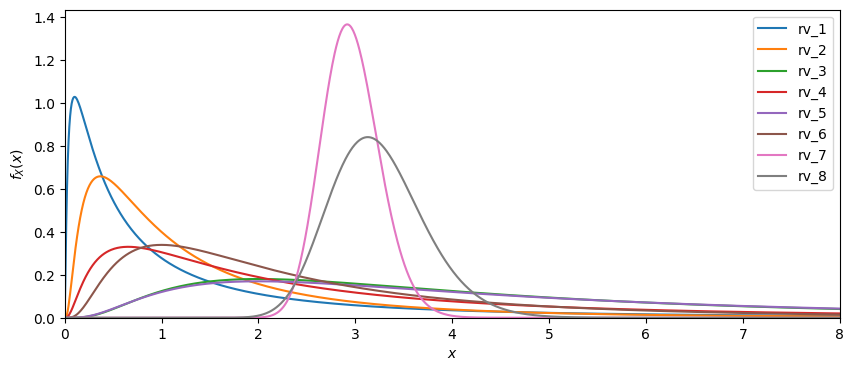

In [25]:
x_up = 8.

fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_pdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':x_up}) 

ax.set_ylim([0., None])
ax.set_xlim([0., x_up])
plt.xlabel(r"$x$")
plt.ylabel(r"$f_X(x)$")
plt.legend()
plt.show()

## CDF

The CDF $F_X(x)$ of the *log-normal* distribution is defined as:

$$F_X(x) = \Phi\left(\frac{\ln(x-\varepsilon)-\lambda}{\zeta}\right)$$

where $\Phi(\cdot)$ is the CDF of the {ref}`content:rv:stdn`.

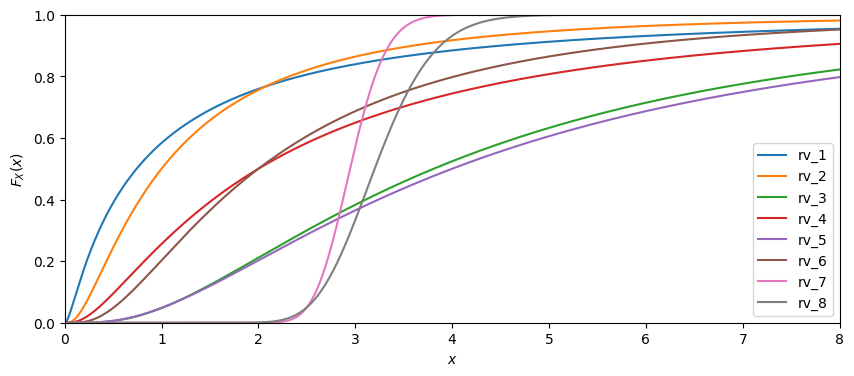

In [26]:
x_up = 8.

fig, ax = plt.subplots(figsize=(10, 4))

for rv in rv_lst:
    flx_plot.draw_cdf(ax, rv, config_dict={'label':rv.get_name(), 'x_low':1e-6, 'x_up':x_up}) 
    
ax.set_ylim([0., 1.])
ax.set_xlim([0., x_up])
plt.xlabel(r"$x$")
plt.ylabel(r"$F_X(x)$")
plt.legend()
plt.show()

## Quantile function

The *quantile function* of the *log-normal* distribution is: 

$$F_X^{-1}(p) = \exp\left( \lambda + \zeta \cdot\Phi^{-1}(p) \right) + \varepsilon \;, \quad p\in(0,1)$$

where $\Phi^{-1}(\cdot)$ is the quantile function of the {ref}`content:rv:stdn`.

## Standardizing Normal random variables

The *log-normal* random variable $X$ can be transformed to a {ref}`content:rv:stdn` $U$ through:

$$U = \frac{\ln(X-\varepsilon)-\lambda}{\zeta}$$

Conversely, a log-normal random variable $X$ with parameters $\lambda$ and $\zeta$ can be generated from a standard Normal variable as:

$$X = \exp\left(\lambda + \zeta \cdot U\right)+\varepsilon$$

## Parametrization in terms of $\mu_X$ and $\sigma_X$

If the mean and standard deviation are given, the parameters $\lambda$ and $\zeta$ can be derived as:

$$\lambda = \ln\left(\mu_X-\varepsilon\right)-\frac{1}{2}\ln\left(\frac{\sigma_X^2}{(\mu_X-\varepsilon)^2}+1\right)$$
$$\zeta = \sqrt{\ln\left(\frac{\sigma_X^2}{(\mu_X-\varepsilon)^2}+1\right)}$$
    
## Covariance of two correlated log-normal random variables

The correlation coefficient $\rho$ between two correlated log-normal random variables $X_1$ and $X_2$ is

$$\rho = \frac{\operatorname{COV}(X_1,X_2)}{\sigma_1\sigma_2} = \frac{\exp\left(\rho^\prime\sqrt{\ln(\delta_1^2+1)\ln(\delta_2^2+1)}\right)-1}{\delta_1\delta_2}$$

where $\delta_1$ and $\delta_2$ is the coefficient of variation of $X_1$ and $X_2$, respectively;
$\rho^\prime$ is the correlation coefficient of the underlying standard Normal random variables.